### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

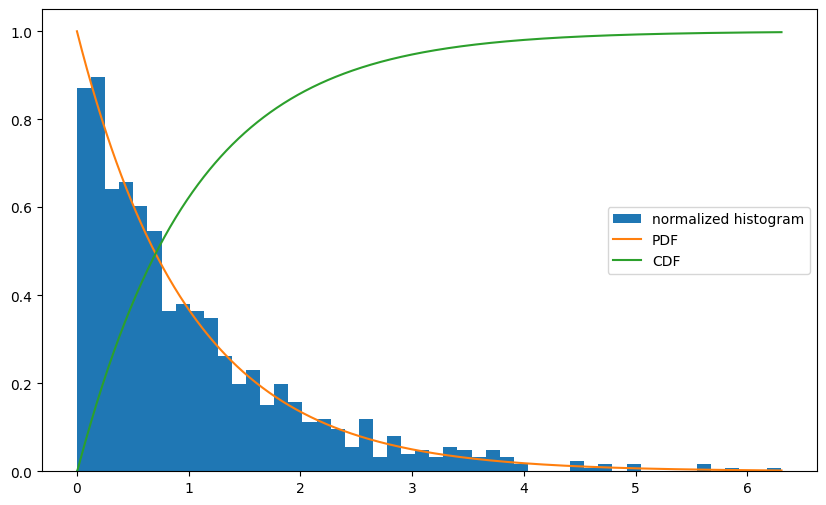

In [31]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import scipy.stats as stats

dist = stats.gamma(a=1)
sample = dist.rvs(size=1000)


plt.figure(figsize=(10, 6))
plt.hist(sample, bins=50, density=True, label='normalized histogram')
x = np.linspace(0, np.max(sample), 1000)
plt.plot(x, dist.pdf(x), label='PDF')
plt.plot(x, fitted_dist.cdf(x), label='CDF')
plt.legend()
plt.show()


In [35]:
a, loc, scale = stats.gamma.fit(sample)
a, loc, scale


(0.9799464939717352, 0.00045077329567572724, 1.0260160062004298)

In [34]:
var_sample = np.var(sample)
print(f"Varianza campione: {var_sample:.3f}")

Varianza campione: 0.947


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

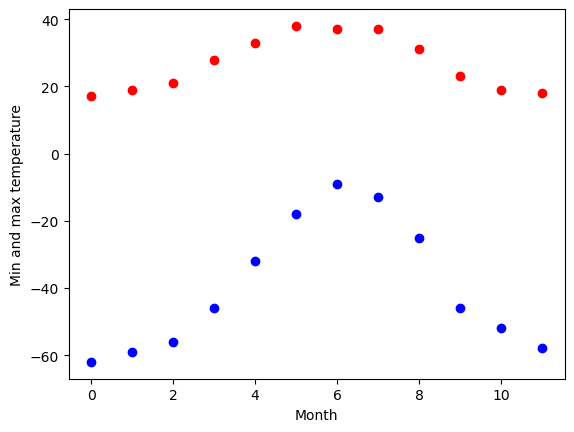

In [5]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


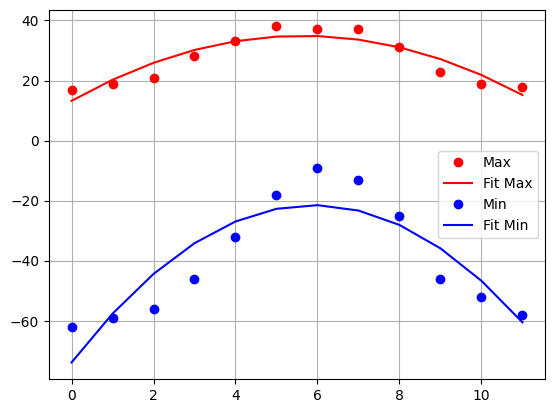

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

fit_max = np.poly1d(np.polyfit(months, temp_max, 2))
fit_min = np.poly1d(np.polyfit(months, temp_min, 2))

pred_max = fit_max(months)
pred_min = fit_min(months)

mae_max = np.mean(np.abs(temp_max - pred_max))
rmse_max = np.sqrt(np.mean((temp_max - pred_max)**2))

mae_min = np.mean(np.abs(temp_min - pred_min))
rmse_min = np.sqrt(np.mean((temp_min - pred_min)**2))

plt.plot(months, temp_max, "ro", label="Max")
plt.plot(months, pred_max, "r-", label="Fit Max")
plt.plot(months, temp_min, "bo", label="Min")
plt.plot(months, pred_min, "b-", label="Fit Min")
plt.legend()
plt.grid(True)
plt.show()



### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Modello: mpg = -0.0412 * disp + 29.5999


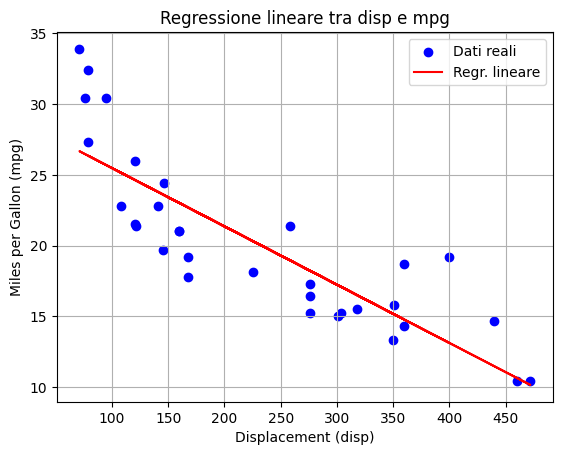

MAE: 2.61
RMSE: 3.15


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

x = df['disp'].values
y = df['mpg'].values

coeffs = np.polyfit(x, y, deg=1)
m, q = coeffs
print(f"Modello: mpg = {m:.4f} * disp + {q:.4f}")

y_pred = m * x + q

plt.scatter(x, y, color='blue', label='Dati reali')
plt.plot(x, y_pred, color='red', label='Regr. lineare')
plt.legend()
plt.grid(True)
plt.show()

# Calcolo MAE e RMSE
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred)**2))
mae, rmse

